# Machine Learning project
- Validate exoplanets Kepler disposition with machine learning methods

In [540]:
%config Completer.use_jedi = False  # enable code auto-completion
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics

from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error    # function to calculate mean squared error 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset


In [541]:
df = pd.read_csv('q1_q17_dr24_koi_2023.09.19_04.32.41.csv')
# Rename the columns
df.columns =['KepID',"KOIName","KeplerName","ExoplanetArchiveDisposition",
"ExoplanetDispositionKepler","DispositionScore","NotTransit-LikeFalsePositiveFlag",
"koi_fpflag_ss","CentroidOffsetFalsePositiveFlag","EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"OrbitalPeriod.[Days]","OrbitalPeriodErr1.[Days]","OrbitalPeriodErr2.[Days]",
"TransitEpoch-bk","TransitEpoch-bkErr1","TransitEpoch-bkErr2",
"ImpactParameter","ImpactParameterErr1","ImpactParameterErr2",
"TransitDuration.[Hours]","TransitDurationErr1.[Hours]","TransitDurationErr2.[Hours]",
"TransitDepth.[ppm]","TransitDepthErr1.[ppm]","TransitDepthErr2.[ppm]",
"PlanetaryRadius","PlanetaryRadiusErr1","PlanetaryRadiusErr2",
"EquilibriumTemperature.[K]","EquilibriumTemperatureErr1.[K]","EquilibriumTemperatureErr2.[K]",
"InsolationFlux","InsolationFluxErr1","InsolationFlux2",
"TransitSignalToNoise",
"TCEPlanetNumber","TCEDeliveryName",
"StellarEffectiveTemperature.[K]","StellarEffectiveTemperatureErr1.[K]","StellarEffectiveTemperatureErr2.[K]",
"StellarSurfaceGravity","StellarSurfaceGravityErr1","StellarSurfaceGravityErr2",
"StellarRadius","StellarRadiusErr1","StellarRadiusErr2",
"RA.[deg]","Dec.[deg]","KeplerMagnitude.[mag]"]

df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,ExoplanetDispositionKepler,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureErr2.[K],StellarSurfaceGravity,StellarSurfaceGravityErr1,StellarSurfaceGravityErr2,StellarRadius,StellarRadiusErr1,StellarRadiusErr2,RA.[deg],Dec.[deg],KeplerMagnitude.[mag]
0,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,NaN,0,0,0,0,...,-50.0,4.455,0.025,-0.025,0.950,0.020,-0.020,286.80847,49.316399,11.338
1,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,NaN,0,1,0,0,...,-80.0,4.021,0.011,-0.011,1.991,0.018,-0.018,292.24728,47.969521,10.463
2,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,NaN,0,0,0,0,...,-91.0,4.590,0.011,-0.041,0.765,0.030,-0.022,297.70935,48.080853,9.174
3,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,NaN,0,1,0,0,...,-109.0,3.657,0.205,-0.107,2.992,0.469,-0.743,294.35654,38.947380,11.432
4,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,-75.0,4.003,0.011,-0.011,1.747,0.042,-0.042,289.73972,44.647419,11.665


# Modify dispositions
Modify KOI pdisposition and KOI disposition into binary form

In [542]:
df['ExoplanetCandidate'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetDispositionKepler'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

# Modify dataframe
Drop columns that are inconvenient. 

In [543]:
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureErr1.[K]', 'StellarEffectiveTemperatureErr2.[K]',
                 'KepID','ExoplanetArchiveDisposition','ExoplanetDispositionKepler',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliveryName', 'EquilibriumTemperatureErr2.[K]', 'DispositionScore'], inplace=True)
df.head()

,OrbitalPeriod.[Days],OrbitalPeriodErr1.[Days],OrbitalPeriodErr2.[Days],TransitEpoch-bk,TransitEpoch-bkErr1,TransitEpoch-bkErr2,ImpactParameter,ImpactParameterErr1,ImpactParameterErr2,TransitDuration.[Hours],...,StellarSurfaceGravityErr1,StellarSurfaceGravityErr2,StellarRadius,StellarRadiusErr1,StellarRadiusErr2,RA.[deg],Dec.[deg],KeplerMagnitude.[mag],ExoplanetCandidate,ExoplanetConfirmed
0,2.470613,1.900000e-08,-1.900000e-08,122.763301,0.000006,-0.000006,0.8186,0.0003,-0.0006,1.74259,...,0.025,-0.025,0.950,0.020,-0.020,286.80847,49.316399,11.338,0,1
1,2.204735,3.800000e-08,-3.800000e-08,121.358572,0.000014,-0.000014,0.0010,0.0111,-0.0010,3.88216,...,0.011,-0.011,1.991,0.018,-0.018,292.24728,47.969521,10.463,0,1
2,4.887803,1.770000e-07,-1.770000e-07,124.813141,0.000028,-0.000028,0.0260,0.0486,-0.0260,2.36386,...,0.011,-0.041,0.765,0.030,-0.022,297.70935,48.080853,9.174,0,1
3,3.849372,1.304000e-06,-1.304000e-06,157.526738,0.000269,-0.000269,0.9193,0.0059,-0.0071,2.66050,...,0.205,-0.107,2.992,0.469,-0.743,294.35654,38.947380,11.432,0,1
4,4.780328,8.760000e-07,-8.760000e-07,132.974137,0.000152,-0.000152,0.9516,0.0011,-0.0023,2.03490,...,0.011,-0.011,1.747,0.042,-0.042,289.73972,44.647419,11.665,1,1


Drop rows from dataframe that include Nan value

In [544]:
df.isna().any()
df.shape

(7470, 37)

In [545]:
# Drop the rows that include Nan
df_cleaned = df.dropna()
df_cleaned.shape

(7291, 37)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_cleaned)


# Features and labels

In [550]:
# Create the feature matrix X and label vector y. 
X = df_cleaned.drop(columns=['ExoplanetCandidate', 'ExoplanetConfirmed']).to_numpy()
y = df_cleaned['ExoplanetCandidate'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.40)

Features in feature matrix

In [553]:
"""for column in df_cleaned.drop(columns=['ExoplanetCandidate', 'ExoplanetConfirmed']).columns:
    print(column)"""
print(X_test)
for column in df.columns:
    print(column)

[[ 8.33979462e-01  1.04600000e-06 -1.04600000e-06 ...  2.95876340e+02
   4.23648190e+01  1.46570000e+01]
 [ 8.82713457e+00  4.02500000e-05 -4.02500000e-05 ...  2.88397000e+02
   4.02131880e+01  1.52470000e+01]
 [ 4.30908145e+00  1.95200000e-05 -1.95200000e-05 ...  2.94292690e+02
   4.61594090e+01  1.45620000e+01]
 ...
 [ 7.78705577e-01  3.34800000e-06 -3.34800000e-06 ...  3.00633030e+02
   4.50766600e+01  1.01520000e+01]
 [ 7.37116340e+01  1.23800000e-03 -1.23800000e-03 ...  2.91457550e+02
   3.77429350e+01  1.26430000e+01]
 [ 2.93706960e+02  1.55400000e-02 -1.55400000e-02 ...  2.93168790e+02
   4.53877300e+01  1.55100000e+01]]
OrbitalPeriod.[Days]
OrbitalPeriodErr1.[Days]
OrbitalPeriodErr2.[Days]
TransitEpoch-bk
TransitEpoch-bkErr1
TransitEpoch-bkErr2
ImpactParameter
ImpactParameterErr1
ImpactParameterErr2
TransitDuration.[Hours]
TransitDurationErr1.[Hours]
TransitDurationErr2.[Hours]
TransitDepth.[ppm]
TransitDepthErr1.[ppm]
TransitDepthErr2.[ppm]
PlanetaryRadius
PlanetaryRadiusErr1


In [548]:
clf = LogisticRegression(C=100, max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
tr_error = mean_squared_error(y_test, y_pred)

print('The training error is: ', tr_error)  
print('The accuracy error is: ', accuracy)   



The training error is:  0.411381556393555
The accuracy error is:  0.588618443606445


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: x and y must be the same size

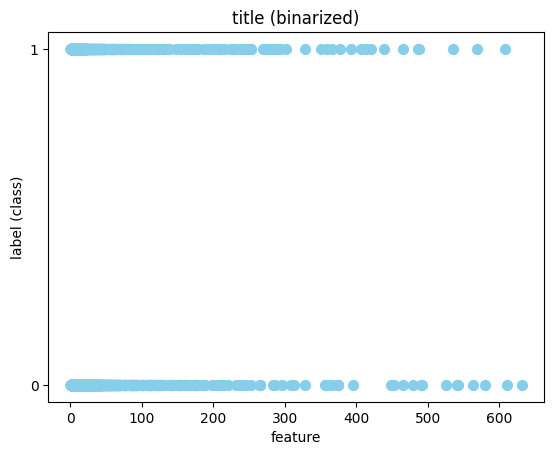

In [549]:
fig, ax = plt.subplots()
ax.set_xlabel("feature")
ax.set_yticks([0,1])
ax.set_ylabel('label (class)')
ax.set_title("title (binarized)")
ax.scatter(X_test[:,0],y_test,s=50,c="skyblue",label="training datapoints")
ax.scatter(X_train[:,0], y_pred, color='r',s=5,label='predicted label ($\hat{y}=1$ if $h(x) > 0$)') 
ax.legend()
plt.show()